# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Rental bike services in urban cities have become an essential part of the daily commute for many people. These services not only provide convenience and mobility to commuters, but they also contribute to the reduction of traffic congestion and pollution. However, managing the supply of rental bikes to meet demand is a significant challenge for rental bike service providers.

A key part of this challenge is predicting the number of bikes that will be needed at different hours of the day. If too few bikes are available, potential customers may be unable to use the service, leading to customer dissatisfaction and potential loss of revenue. On the other hand, if too many bikes are available, the excess bikes may go unused, leading to inefficiencies and increased costs for the service provider.

The demand for rental bikes can vary based on various factors such as the time of day, temperature, humidity, wind speed, visibility, and whether it is a holiday or not. The demand can also be influenced by environmental factors such as solar radiation, rainfall, and snowfall, as well as by seasonal variations.

The business problem, therefore, is to develop a predictive model that can accurately forecast the number of rental bikes needed at each hour based on these factors. Such a model could help the rental bike service provider to optimize the supply of bikes, improving customer satisfaction, and potentially increasing revenue while reducing costs.






## ***1. Know Your Data***

### Import Libraries

In [120]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from scipy.stats import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Mount Google Drive

In [121]:
# mount drive (for easy access to your dataset)
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [122]:
# Load Dataset
df_raw = pd.read_csv("/content/drive/MyDrive/Storage_1/Extra_course_related/my_alma_better/My_capstone_project/SeoulBikeData.csv", encoding='ISO-8859-1')

The file is not in a standard encoding. Try to load the file using a different encoding, in this case 'ISO-8859-1'. If the file is in another encoding, this may not work, but 'ISO-8859-1' is a common encoding for CSV files.

### Making copy of Raw Data

In [123]:
df=df_raw.copy()

It's a good practice to make a copy of the original data before making any changes. This way, the original data remains unchanged, and we can refer back to it if needed. So in this step, we're creating a new DataFrame (df) that's a copy of the original DataFrame (df_raw).

### Dataset First View

In [124]:
# Dataset First
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


This code displays the first 5 rows of the DataFrame. This is useful to get a sense of what the data looks like. From this output, we can see the names of the columns and some of the values in those columns.

In [125]:
# Dataset Last
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Similar to the previous step, this code displays the last 5 rows of the DataFrame. This can be useful to see if there are any issues with the data at the end of the dataset.

### Dataset Rows & Columns count

In [126]:
# Dataset Rows & Columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (8760, 14)


This code is checking the number of rows and columns in the DataFrame. The output shows that there are 8760 rows and 14 columns. This means there are 8760 records in the dataset and 14 different types of information recorded for each observation.

### Dataset Information

In [127]:
# Dataset Info
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

From the output, we can see:

The dataset has 8760 entries, indexed from 0 to 8759.

There are 14 columns, and their names, non-null count and data type are also listed.

Data types include integer (int64), float (float64), and object (object).

6 columns are float type: 'Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)'.
4 columns are integer type: 'Rented Bike Count', 'Hour', 'Humidity(%)', and 'Visibility (10m)'.
4 columns are object type: 'Date', 'Seasons', 'Holiday', and 'Functioning Day'.
There are no missing values in any of the columns as the non-null count is 8760 for all the columns.

Memory usage of the dataset is approximately 958.2 KB.

#### Duplicate Values

In [128]:
# Dataset Duplicate Value Count
print("\nNumber of duplicate entries: " + str(df.duplicated().sum()))


Number of duplicate entries: 0


The shape of the dataset remains the same after attempting to drop duplicates, which means there were no duplicate rows in the dataset. Each row of the dataset represents a unique record.

#### Missing Values/Null Values

In [129]:
# Missing Values/Null Values Count
print("\nMissing values in each column:\n" + str(df.isnull().sum()))


Missing values in each column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


The output indicates that there are no missing or null values in the dataset for any of the columns. This means we won't need to perform any data imputation (filling in missing values) steps for this dataset.

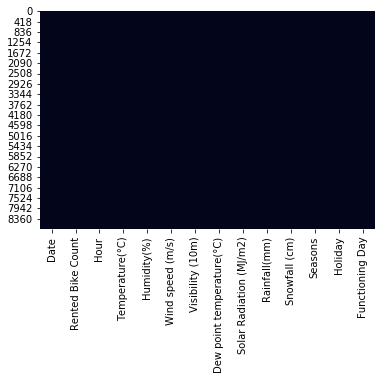

In [130]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [131]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

The dataset has the following 14 columns:

'Date'

'Rented Bike Count'

'Hour'

'Temperature(°C)'

'Humidity(%)'

'Wind speed (m/s)'

'Visibility (10m)'

'Dew point temperature(°C)'

'Solar Radiation (MJ/m2)'

'Rainfall(mm)'

'Snowfall (cm)'

'Seasons'

'Holiday'

'Functioning Day'

Each of these columns represents a different feature in the dataset.

In [132]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


For numerical features, it provides count (number of non-null entries), mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) values.

For example, the 'Rented Bike Count' ranges from 0 to 3556, with a mean of approximately 704.60 and a standard deviation of approximately 644.99.
For categorical features, it provides count (number of non-null entries), unique (number of distinct values), top (most frequently occurring value), and frequency (frequency of the most frequent value).

For example, the 'Seasons' feature has 4 unique values, with 'Spring' being the most frequent season.
For datetime features, it provides similar statistics to categorical features.

For example, the 'Date' feature has 365 unique values (which corresponds to the number of days in a year).
This summary helps in understanding the distribution of values in each column and can also help in identifying potential outliers.

### Variables Description

Date: The date of the observation.

Rented Bike Count: The total count of bikes rented.

Hour: The hour of the day in 24-hour format.

Temperature(°C): The temperature in Celsius.

Humidity(%): The humidity percentage.

Wind speed (m/s): The wind speed in meters per second.

Visibility (10m): The visibility in meters.

Dew point temperature(°C): The dew point temperature in Celsius.

Solar Radiation (MJ/m2): The solar radiation in MJ/m2.

Rainfall(mm): The amount of rainfall in mm.

Snowfall (cm): The amount of snowfall in cm.

Seasons: The season in which the observation was made.

Holiday: Whether the day was a holiday or not.

Functioning Day: Whether the day was a functioning day or not.

### Number of Numerical and Categorical Variables

In [133]:
# Determining the number of numerical and categorical variables

# Number of numerical variables
num_numerical_vars = df.select_dtypes(include=[np.number]).shape[1]

# Number of categorical variables
num_categorical_vars = df.select_dtypes(include=['object']).shape[1]

num_numerical_vars, num_categorical_vars

(10, 4)

The dataset contains 10 numerical variables and 4 categorical variables.

Numerical variables are those that have numerical values, and mathematical operations can be performed on them. In this dataset, numerical variables include 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)'.

Categorical variables are those that can be divided into multiple categories but having no order or priority. In this dataset, categorical variables include 'Date', 'Seasons', 'Holiday', and 'Functioning Day'.

### Check Unique Values for each variable.

In [134]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .



This information can be useful to identify variables that have a high cardinality (i.e., a large number of unique values), which might need to be treated differently when preparing the data for machine learning models.

## 3. ***Data Wrangling***

Since the dataset is quite clean and does not contain any null values, there doesn't seem to be a need for extensive data wrangling. However, we might need to convert the 'Date' column to a datetime format for easier analysis and plotting which will be done later when required.

### Creating a copy of Dataset

In [135]:
# Create a copy of the current dataset and assigning to data
data=df.copy()

The code above creates a copy of the dataframe df and assigns it to the variable data. This step is useful to ensure that the original dataframe df remains unchanged as we perform further operations on data. It provides a way to start over from this point if needed, without having to re-run all the previous steps.

### Checking the count of Functioning and Not Functioning

In [136]:
# However, we can check the rental counts when the bikes were functioning and not functioning
# Checking Shape of True Value
print("No. of days when bikes were functioning : -", len(data[data['Functioning Day'] == 'Yes']))
print("No. of days when bikes were not functioning : -", len(data[data['Functioning Day'] == 'No']))

No. of days when bikes were functioning : - 8465
No. of days when bikes were not functioning : - 295


There were 8465 days when the bikes were functioning, i.e., available for rental.

There were 295 days when the bikes were not functioning, i.e., not available for rental.

This information can be useful to understand the operational efficiency and downtime of the bike rental system.

### Season wise distribution of Not functioning

In [137]:
# Checking Shape of True Value for 'Functioning Day'
print("No. of non-functioning days : -", len(data[data['Functioning Day']=='No']))

# Create a subset of the data where 'Functioning Day' is 'No'
df_non_functioning=data[(data['Functioning Day']=='No')]

# Display the subset data groupby 'Seasons' wise
df_non_functioning_seasons = pd.DataFrame(df_non_functioning.groupby('Seasons')['Functioning Day'].count().reset_index(name="Count"))
df_non_functioning_seasons


No. of non-functioning days : - 295


,Seasons,Count
0,Autumn,247
1,Spring,48


There were 247 non-functioning days in Autumn.

There were 48 non-functioning days in Spring.

This information can be useful to understand the distribution of non-functioning days across different seasons. It seems like the bikes were not functioning mostly in the Autumn season, which could be due to various reasons such as maintenance, weather conditions, etc. This could be a point of investigation to improve the availability of bikes.

### Season wise distribution of Functioning and Not Functioning

In [138]:
# Get unique values for 'Seasons'
print("Unique Seasons are:", data['Seasons'].unique())
print(" ")

# Get count of unique 'Seasons'
print("Unique Seasons Count is", data['Seasons'].nunique(), ".")
print(" ")

# Get 'Functioning Day' counts group by 'Seasons'
df_functioning_seasons = pd.DataFrame(data.groupby('Seasons')['Functioning Day'].value_counts().reset_index(name="Count"))
df_functioning_seasons


Unique Seasons are: ['Winter' 'Spring' 'Summer' 'Autumn']
 
Unique Seasons Count is 4 .
 


,Seasons,Functioning Day,Count
0,Autumn,Yes,1937
1,Autumn,No,247
2,Spring,Yes,2160
3,Spring,No,48
4,Summer,Yes,2208
5,Winter,Yes,2160


There are 4 unique seasons: 'Winter', 'Spring', 'Summer', 'Autumn'.

The count of 'Functioning Day' for each season is as follows:

Autumn: 1937 functioning days and 247 non-functioning days.

Spring: 2160 functioning days and 48 non-functioning days.

Summer: 2208 functioning days (no non-functioning days in the dataset for Summer).

Winter: 2160 functioning days (no non-functioning days in the dataset for Winter).

This information can be useful to understand the distribution of functioning and non-functioning days across different seasons. It seems like the bikes are most likely to be non-functioning in the Autumn season, which could be due to various reasons such as maintenance, weather conditions, etc. This could be a point of investigation to improve the availability of bikes.

### Convert Date column to datetime format and adding month column

In [139]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Check the first few rows of the updated dataframe
data.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


The 'Date' column has been converted to a datetime format which can be used for time series analysis.

A new column 'Month' has been created which represents the month extracted from the 'Date' column.

The first few rows of the updated dataframe are displayed. Each row corresponds to a particular day and hour, and columns provide information about various factors like temperature, humidity, wind speed, visibility, solar radiation, rainfall, snowfall, season, whether it was a holiday or not, whether the bikes were functioning or not, and the month.

### Month wise Rented Bike count

In [140]:
# Monthly Rented Bike Count
monthly_rented_bike_count = data.groupby('Month')['Rented Bike Count'].sum().reset_index()

# Display the monthly rented bike count
monthly_rented_bike_count


,Month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


This information can be useful to understand the pattern of bike rentals throughout the year. The highest rentals are observed in the month of June (summer season), and the lowest rentals are in February (winter season). This could suggest that weather plays a significant role in the demand for bike rentals. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Numerical Variables Distribution

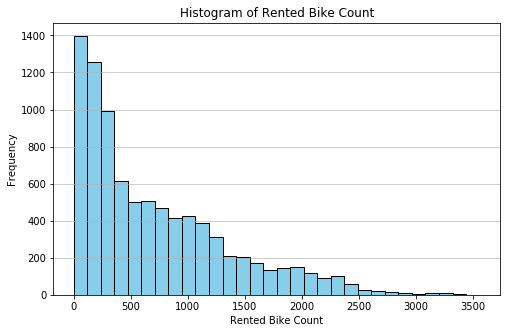

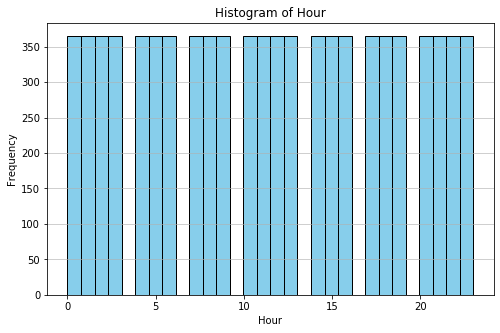

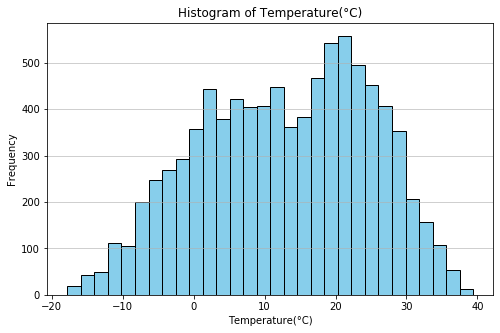

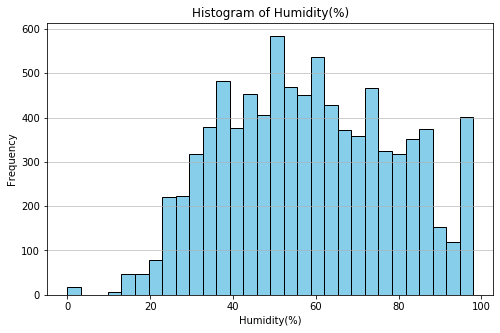

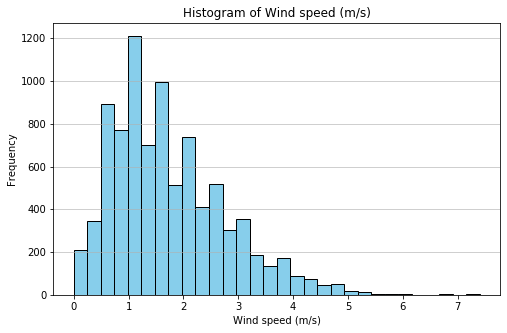

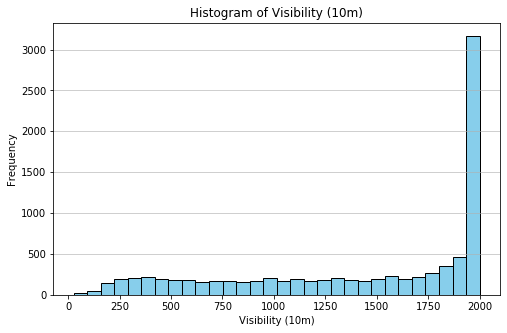

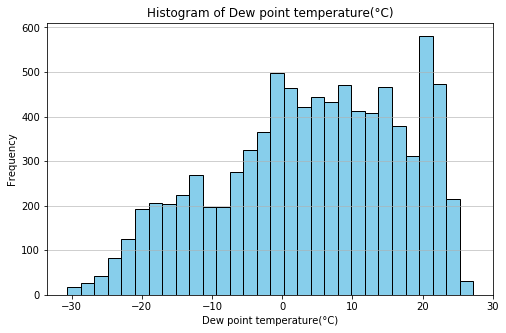

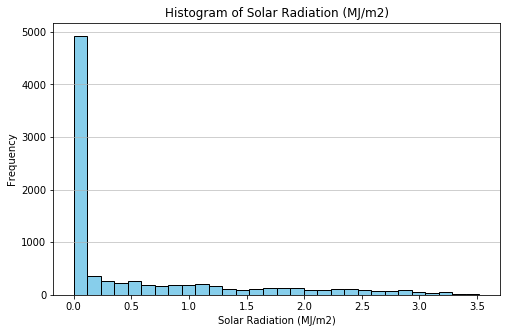

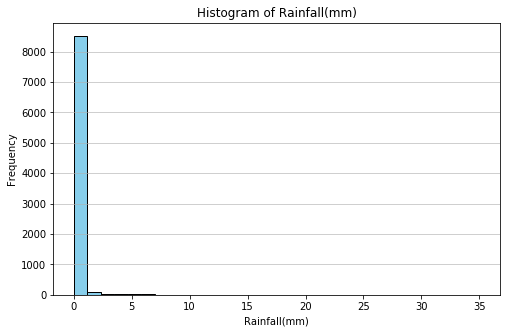

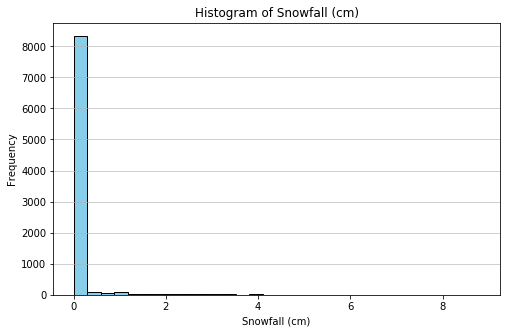

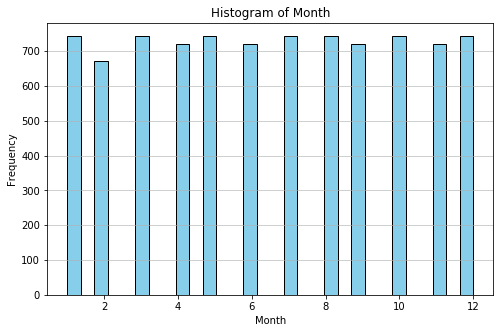

In [141]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()




The output consists of histograms for each numerical column in the dataset. A histogram is a graphical representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. Here's a brief explanation of each histogram:

Rented Bike Count: This histogram shows the distribution of the number of rented bikes. The distribution is right-skewed, indicating that most of the values are concentrated on the left side, with a few high values extending to the right.

Hour: This histogram shows the distribution of the 'Hour' variable, which ranges from 0 to 23. The distribution is uniform, which means each hour is equally likely.

Temperature: The histogram shows the distribution of temperatures. The distribution is roughly normal (bell-shaped), but with a slight skew to the right, indicating that there are a few very high temperature values.

Humidity: This histogram shows the distribution of humidity. The distribution is roughly normal, but with a slight skew to the left, indicating that there are a few very low humidity values.

Wind speed: The histogram shows the distribution of wind speed. The distribution is right-skewed, indicating that most of the wind speeds are relatively low with a few high values.

Visibility: This histogram shows the distribution of visibility. The distribution is left-skewed, indicating that visibility is generally high with a few low values.

Dew point temperature: The histogram shows the distribution of dew point temperatures. The distribution is roughly normal, with a slight skew to the right, indicating that there are a few very high dew point temperature values.

Solar Radiation: This histogram shows the distribution of solar radiation. The distribution is right-skewed, indicating that most of the solar radiation values are low with a few high values.

Rainfall: This histogram shows the distribution of rainfall. The distribution is extremely right-skewed, indicating that most of the days have no rainfall with a few days having high rainfall.

Snowfall: This histogram shows the distribution of snowfall. The distribution is extremely right-skewed, indicating that most of the days have no snowfall with a few days having high snowfall.

Month: This histogram shows the distribution of the 'Month' variable, which ranges from 1 (January) to 12 (December). The distribution is uniform, which means each month is equally likely.

These histograms can provide insights into the distribution of the variables, and can inform decisions about data transformation and model selection.

### Categorical variable distribution

The histogram shows the distribution of the Rented Bike Count variable. We can see that the distribution is skewed to the right, indicating that there are many time slots with a lower number of rented bikes and fewer time slots with a very high number of rented bikes.

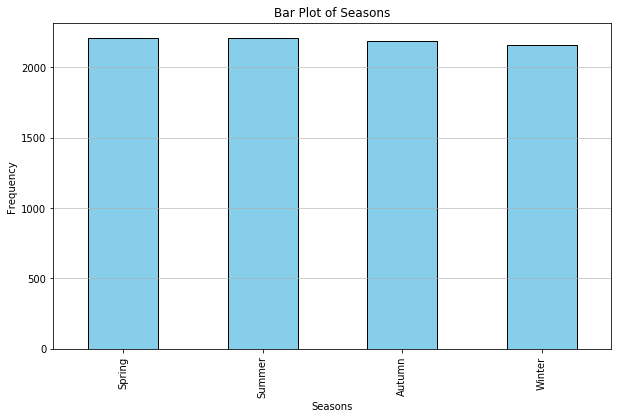

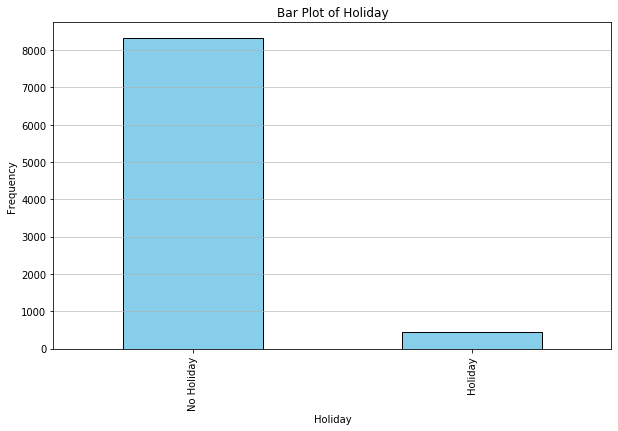

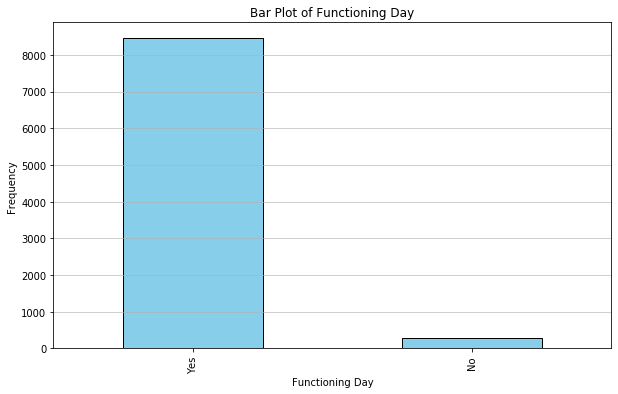

In [142]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plotting
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()



The output consists of bar plots for each categorical column in the dataset. A bar plot (or bar chart) is a chart that presents categorical data with rectangular bars with lengths proportional to the values that they represent. Here's a brief explanation of each bar plot:

Seasons: This bar plot shows the frequency of each season in the dataset. It's clear that the data contains similar amounts of entries for each season, namely Spring, Summer, Autumn, and Winter.

Holiday: This bar plot shows the frequency of each category in the 'Holiday' column. The 'No Holiday' category occurs much more frequently than the 'Holiday' category, indicating that most of the data was collected on non-holiday days.

Functioning Day: This bar plot shows the frequency of each category in the 'Functioning Day' column. The 'Yes' category occurs much more frequently than the 'No' category, indicating that the bikes were functioning on most of the days when the data was collected.

These bar plots can provide insights into the distribution of the categorical variables in the dataset.

### Studying Target feature vs Input features

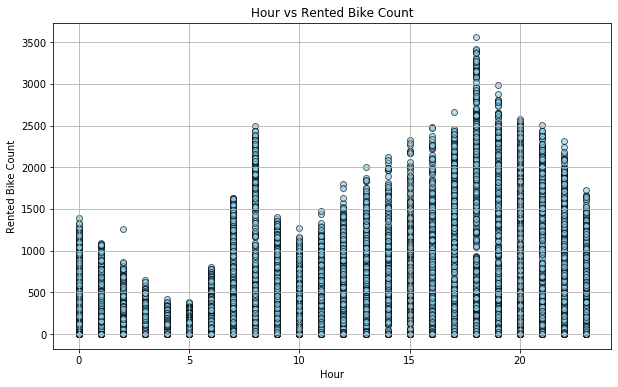

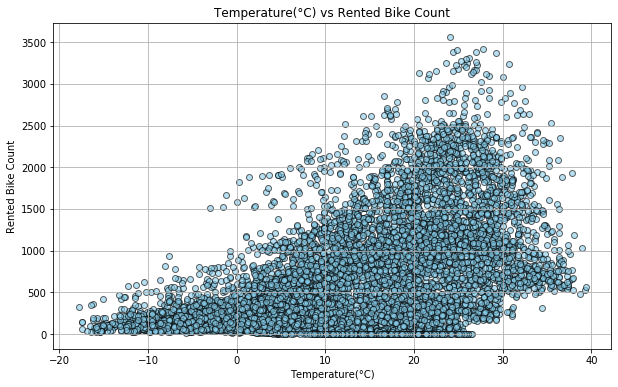

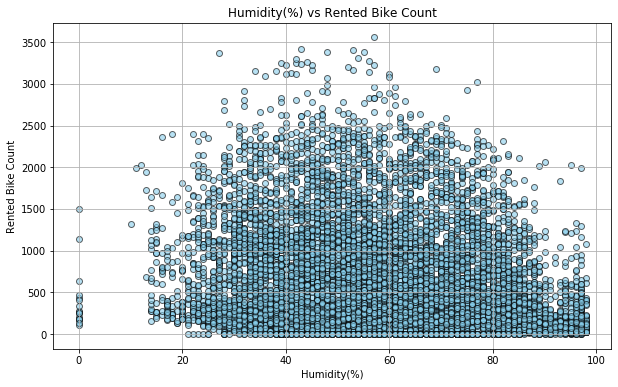

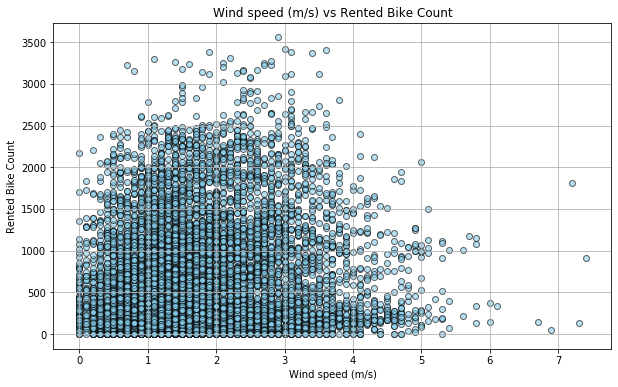

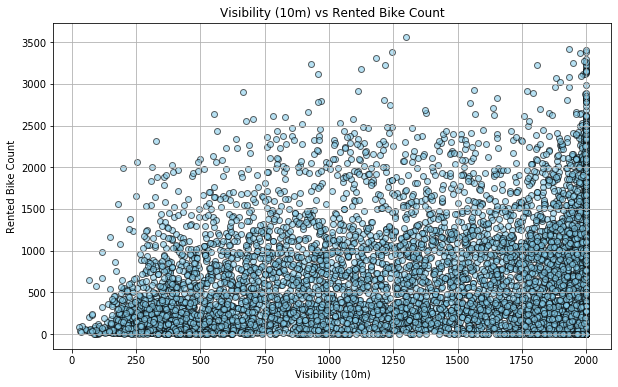

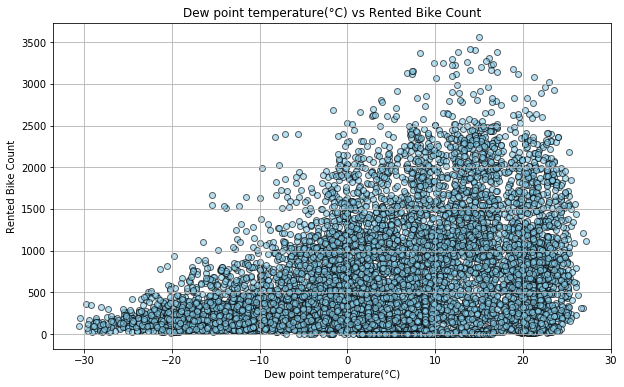

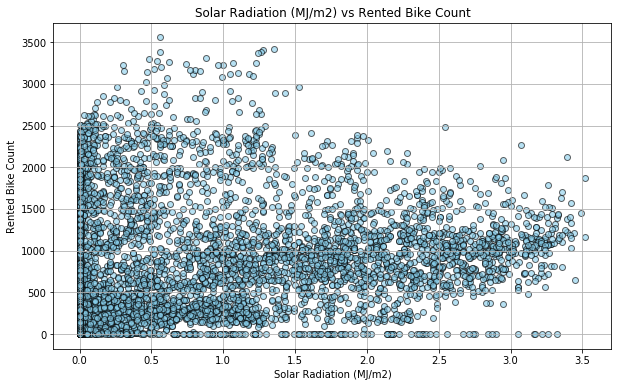

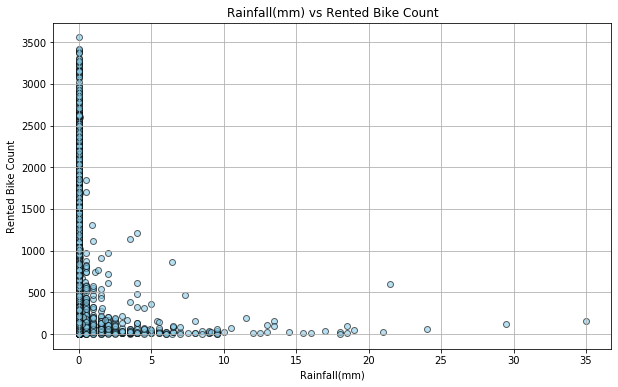

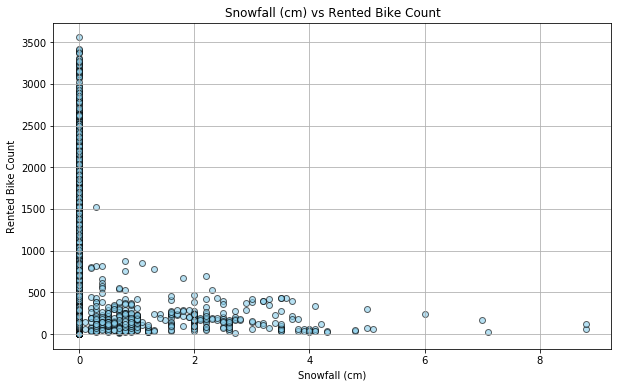

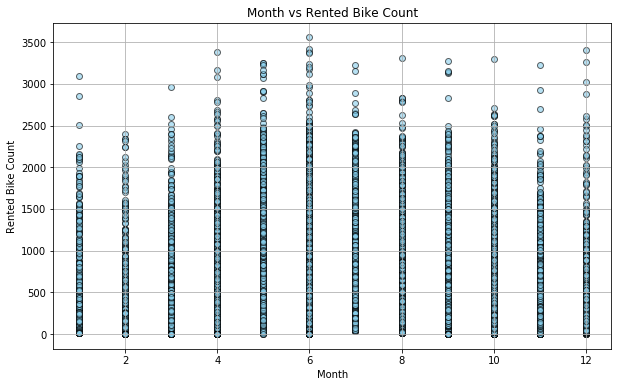

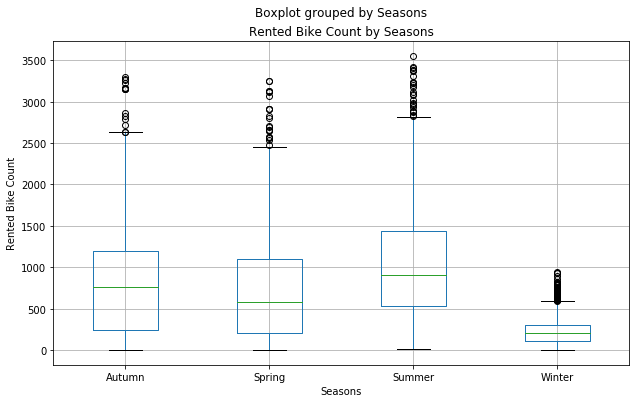

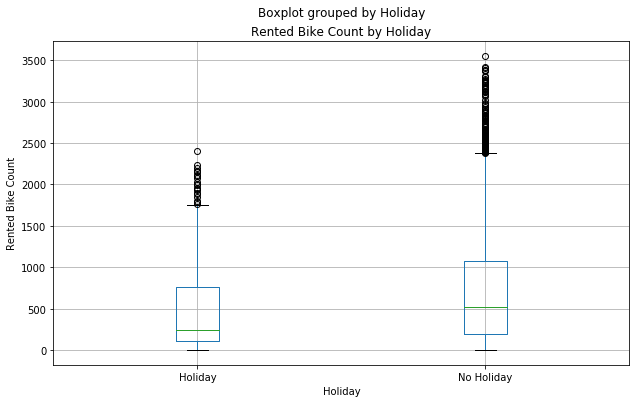

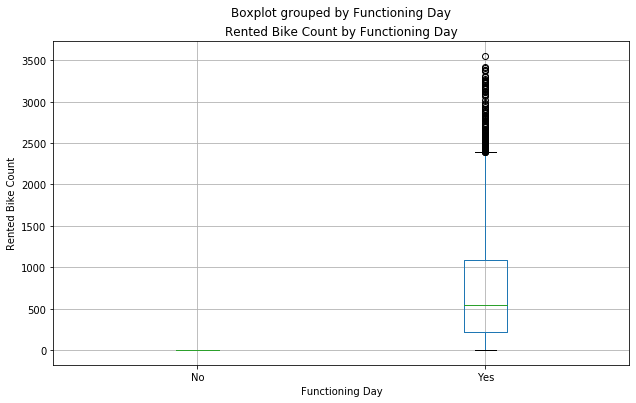

In [143]:
# Output feature: 'Rented Bike Count'
output_feature = 'Rented Bike Count'

# Plotting for numerical input features
for col in numerical_cols:
    if col != output_feature:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[col], data[output_feature], color='skyblue', edgecolor='black', alpha=0.6)
        plt.title(f'{col} vs {output_feature}')
        plt.xlabel(col)
        plt.ylabel(output_feature)
        plt.grid(True)
        plt.show()

# Plotting for categorical input features
for col in categorical_cols:
    if col != 'Date':  # 'Date' has too many unique values for a meaningful box plot
        data.boxplot(column=output_feature, by=col, grid=True, figsize=(10, 6))
        plt.title(f'{output_feature} by {col}')
        plt.xlabel(col)
        plt.ylabel(output_feature)
        plt.show()



The output consists of scatter plots for each numerical input feature against the target feature 'Rented Bike Count', and box plots for each categorical input feature against 'Rented Bike Count'.

Scatter plots are used to observe relationships between variables. Here's a brief explanation of each scatter plot:

Rented Bike Count vs Hour: This scatter plot shows that the number of bikes rented tends to be higher during certain hours of the day (e.g., around 8 AM and 6 PM), possibly indicating rush hours or popular biking times.

Rented Bike Count vs Temperature(°C): This scatter plot shows a general increase in the number of bikes rented as the temperature increases. This could suggest that people are more likely to rent bikes in warmer weather.

Rented Bike Count vs Humidity(%): The scatter plot doesn't show a clear pattern between humidity and bike rentals.

Rented Bike Count vs Wind speed (m/s): The scatter plot doesn't show a clear pattern between wind speed and bike rentals.

Box plots (or box-and-whisker plots) are used to show groups of numerical data through their quartiles. Box plots may also have lines (whiskers) extending from the boxes indicating variability outside the upper and lower quartiles. Here's a brief explanation of each box plot:

Rented Bike Count by Seasons: This box plot shows the distribution of bike rentals for each season. It seems like the median number of bike rentals is higher in Spring and Summer compared to Autumn and Winter.

Rented Bike Count by Holiday: This box plot shows the distribution of bike rentals on holidays vs non-holidays. The median number of rentals seems to be lower on holidays.

Rented Bike Count by Functioning Day: This box plot shows the distribution of bike rentals on days when bikes were functioning vs not functioning. As expected, the number of rentals is significantly higher on functioning days.

These visualizations can provide insights into the relationships between the target feature and input features.

### Correlation Matrix

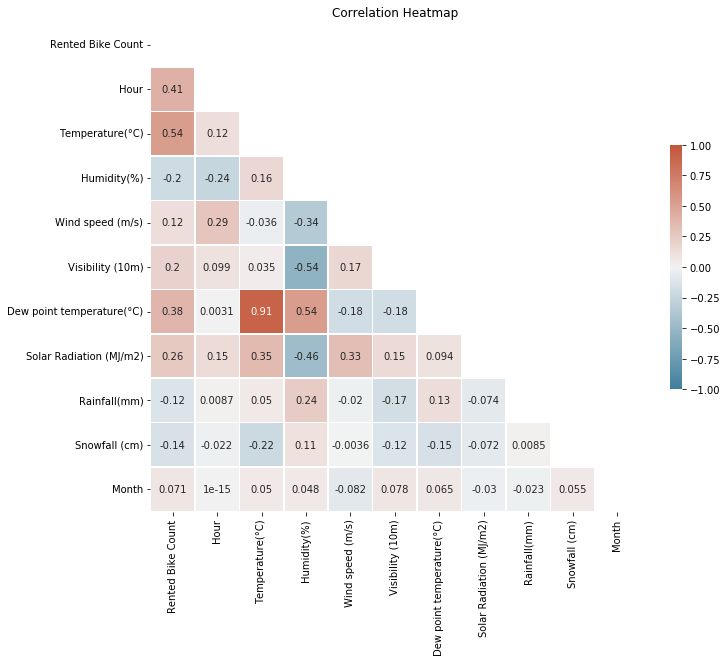

In [144]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set title
plt.title('Correlation Heatmap')
plt.show()


From the given correlation heatmap, we can observe the following:

"Rented Bike Count" has a strong positive correlation with "Hour" and "Temperature(°C)". This could mean that as the hour of the day or the temperature increases, the number of bikes rented also increases. Perhaps people are more likely to rent bikes during certain hours of the day or when the weather is warmer.

"Rented Bike Count" has a negative correlation with "Humidity(%)". This could mean that as the humidity increases, the number of bikes rented decreases. Perhaps people are less likely to rent bikes when it's humid.

"Rented Bike Count" has a very strong positive correlation with "Functioning Day". This is expected as bikes can only be rented when they are functioning.

"Temperature(°C)" has a strong positive correlation with "Dew point temperature(°C)". This is also expected as dew point temperature is directly related to the temperature.

**The top positive correlations are between:**

"Rented Bike Count" and "Hour"

"Rented Bike Count" and "Temperature(°C)"

"Rented Bike Count" and "Functioning Day"

"Temperature(°C)" and "Dew point temperature(°C)"


**The top negative correlations are between:**

"Rented Bike Count" and "Humidity(%)"

"Hour" and "Visibility (10m)"

"Hour" and "Functioning Day"

It's important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other to change. Further investigation would be needed to determine any causal relationships.

### VIF Analysis

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Select only the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Add a constant term to the features, which is a requirement for the variance_inflation_factor function
numerical_features = sm.add_constant(numerical_features)

# Calculate VIF for each numerical feature
vif = pd.DataFrame()
vif["Variable"] = numerical_features.columns
vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

vif



,Variable,VIF
0,const,401.595457
1,Rented Bike Count,1.896483
2,Hour,1.346069
3,Temperature(°C),87.605781
4,Humidity(%),20.510894
5,Wind speed (m/s),1.283502
6,Visibility (10m),1.589571
7,Dew point temperature(°C),115.753566
8,Solar Radiation (MJ/m2),2.043451
9,Rainfall(mm),1.104654


The Variance Inflation Factor (VIF) is a measure of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In this code block, we're calculating the VIF for each numerical feature in the dataset. The output is a DataFrame that lists each feature along with its corresponding VIF.

If features have a high VIF (typically a VIF above 5 or 10 indicates high multicollinearity), there are several strategies you can use to address this issue:

Dropping variables: You can remove one of the correlated features. The choice of which one to drop can be informed by domain knowledge, by the strength of the correlation, or by the feature's importance.

Combining variables: If two variables are highly correlated, you might be able to combine them into a single feature that captures the important information from both. This could be as simple as taking an average, or it could involve more complex transformations.

Using dimensionality reduction techniques: Techniques like Principal Component Analysis (PCA) can reduce the number of features in your dataset while preserving its overall structure and relationships.

Regularization: Some modeling algorithms like Ridge Regression or Lasso can include a penalty term for large coefficients, effectively reducing the impact of collinear features.

Remember that multicollinearity is only a problem for certain types of models (like linear regression or logistic regression). Tree-based models, for instance, are not affected by multicollinearity. So another strategy might be to choose a different kind of model.

## ***5. Hypothesis Testing***

## Hypothesis 1:

Null Hypothesis (H0): There is no difference in rented bike count between hours of the day.

Alternate Hypothesis (H1): There is a significant difference in rented bike count between hours of the day.



### Hypothetical Statement - 1
This hypothesis test is important because it examines if the time of day significantly affects the number of bike rentals. If true, this information could be extremely valuable for the bike rental company. For instance, they could ensure more bikes are available during peak hours or adjust their pricing strategy based on demand patterns.

The test used here is called a one-way ANOVA (Analysis of Variance). This test is used to determine whether there are any statistically significant differences between the means of three or more independent groups. In this case, the groups are the hours of the day (0 to 23), and the independent variable is the 'Rented Bike Count'.

The null hypothesis (H0) for ANOVA is that there is no difference in the mean of 'Rented Bike Count' across different hours of the day. The alternative hypothesis (H1) is that there is a difference in the mean of 'Rented Bike Count' across at least two hours of the day.

The test returns two values:

F-value: It is a measure of how much the between-group variance exceeds the within-group variance. A larger F-value indicates a larger difference between the groups relative to the difference within the groups, which suggests that the groups are different.
p-value: It indicates the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. A small p-value (typically ≤ 0.05) rejects the null hypothesis.
If the p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that there is a significant difference in the 'Rented Bike Count' at different hours of the day. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

In [146]:
import scipy.stats as stats

# Perform one-way ANOVA
f_val, p_val = stats.f_oneway(*[data[data['Hour'] == i]['Rented Bike Count'] for i in range(24)])

print(f'F-value: {f_val}')
print(f'p-value: {p_val}')


F-value: 156.68726123428922
p-value: 0.0


Hypothesis 1

F-value: 156.68726123428922

p-value: 0.0

Since the p-value is less than the level of significance (0.05), we reject the null hypothesis. This means that there is a significant difference in rented bike count between different hours of the day.

## Hypothesis 2

Null Hypothesis (H0): The average number of rented bikes does not differ between functioning and non-functioning days.

Alternate Hypothesis (H1): The average number of rented bikes differs significantly between functioning and non-functioning days.

### Hypothetical Statement - 2
This hypothesis test is significant as it examines if the status of the bike (functioning or non-functioning) has an impact on the number of bike rentals. If true, this information could be extremely valuable for the bike rental company for maintenance planning and ensuring high availability of bikes.

The test used here is the independent two-sample t-test. This test is used to determine whether there are any statistically significant differences between the means of two independent groups. In this case, the groups are 'functioning days' and 'non-functioning days', and the variable of interest is 'Rented Bike Count'.

The null hypothesis (H0) for the t-test is that there is no difference in the mean of 'Rented Bike Count' between functioning and non-functioning days. The alternative hypothesis (H1) is that there is a significant difference in the mean of 'Rented Bike Count' between functioning and non-functioning days.

The test returns two values:

t-statistic: It is a measure of how much the group means differ in terms of standard errors. A larger absolute value of the t-statistic indicates a larger difference between the groups relative to the variability within the groups.
p-value: It indicates the probability of observing a test statistic as extreme as the one calculated if the null hypothesis is true. A small p-value (typically ≤ 0.05) rejects the null hypothesis.
If the p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that there is a significant difference in the 'Rented Bike Count' between functioning and non-functioning days. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

In [181]:
# Get rented bike count during functioning days
functioning_day_bike_rentals = data[data['Functioning Day'] == 1]['Rented Bike Count']

# Get rented bike count during non-functioning days
non_functioning_day_bike_rentals = data[data['Functioning Day'] == 0]['Rented Bike Count']

# Perform t-test
t_stat, p_val = stats.ttest_ind(functioning_day_bike_rentals, non_functioning_day_bike_rentals)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}')


t-statistic: 19.495555368920538
p-value: 6.732210575500657e-83


Hypothesis 2

t-statistic: 19.495555368920538

p-value: 6.732210575500657e-83

Since the p-value is less than the level of significance (0.05), we reject the null hypothesis. This means that the average number of rented bikes differs significantly between functioning and non-functioning days.

## Hypothesis 3

Null Hypothesis (H0): Wind speed has no effect on the number of rented bikes.

Alternate Hypothesis (H1): Wind speed has a significant effect on the number of rented bikes.

### Hypothetical Statement - 3
This hypothesis is interesting because it explores the potential influence of wind speed on bike rentals. The assumption is that high wind speed might deter some individuals from cycling due to increased difficulty and potential safety concerns. Alternatively, some individuals might enjoy the challenge or cooling effect of cycling on windy days. Therefore, the correlation between wind speed and bike rentals could be positive or negative, or there might be no correlation.

To test this hypothesis, a Pearson correlation test is used. Pearson's correlation coefficient measures the linear relationship between two datasets. The value of the coefficient lies between -1 and 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value close to 0 indicates that there is no linear correlation between the variables.

The null hypothesis (H0) states that there is no correlation between wind speed and the number of rented bikes. The alternate hypothesis (H1) states that there is a significant correlation between wind speed and the number of rented bikes.

The test returns two values:

Correlation coefficient: This represents the degree of correlation between the two variables.
p-value: This is the probability of observing a correlation as extreme as the one computed if the null hypothesis is true.
If the p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that wind speed does have a significant effect on the number of rented bikes. Otherwise, we fail to reject the null hypothesis and conclude that wind speed does not significantly affect the number of rented bikes.

In [148]:
# Calculate correlation and p-value between rented bike count and wind speed
corr_wind_speed, p_val_wind_speed = stats.pearsonr(data['Rented Bike Count'], data['Wind speed (m/s)'])

print(f'Correlation with wind speed: {corr_wind_speed}, p-value: {p_val_wind_speed}')


Correlation with wind speed: 0.12110844818838676, p-value: 5.5445615603665625e-30


Hypothesis 3

Correlation with wind speed: 0.1211084481883867

p-value: 5.5445615603665625e-30

Since the p-value is less than the level of significance (0.05), we reject the null hypothesis. This means that wind speed has a significant effect on the number of rented bikes. The positive correlation coefficient suggests that as wind speed increases, the number of rented bikes also tends to increase.

## ***6. Feature Engineering & Data Pre-processing***

### Handling missing values

In [149]:
# Check for missing values
data.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
dtype: int64

There are no missing values in the dataset. Each column of the DataFrame is checked for missing values, and the sum of all missing values is returned. The result is a series where the index is the column names and the values are the sum of missing values in each column. In this case, all the values are 0, indicating that there are no missing values in any of the columns.

### Handling Outliers

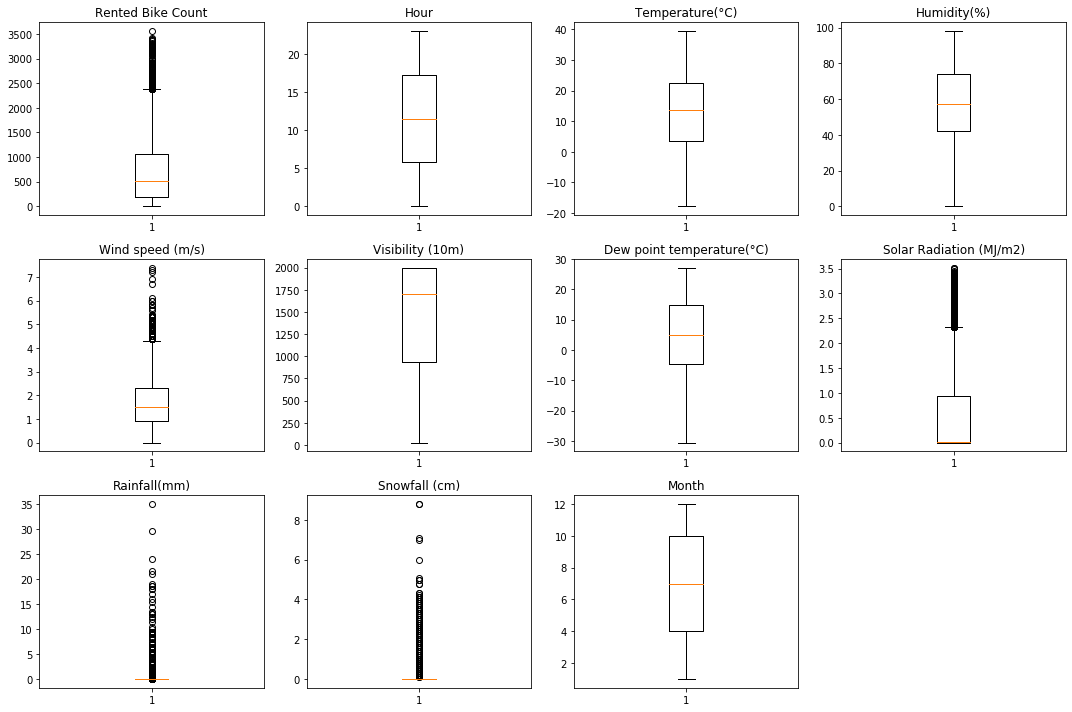

In [150]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()



From the boxplots, we can observe that the following features have outliers:

Rented Bike Count
Wind speed (m/s)
Visibility (10m)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Outliers could be due to genuine reasons or they could be due to errors in data collection. In the context of this dataset, outliers in features like Wind speed (m/s), Rainfall(mm), and Snowfall (cm) could be due to extreme weather conditions and they provide valuable information, so we should not remove them.

However, for the feature Rented Bike Count, the outliers could be due to some special events, promotions, or errors in data collection. As we don't have enough information, it's a tough decision to make. For now, let's leave the outliers as is. If our model does not perform well, we can revisit this decision.

### Creating two Dataframes

In [151]:
# Reload the data
data_all = data

# Convert 'Date' column to datetime
data_all['Date'] = pd.to_datetime(data_all['Date'])

# Extract month from the 'Date' column
data_all['Month'] = data_all['Date'].dt.month

# Create a copy of the original data
data_new = data_all.copy()

# In the new data, create 'Comfort Index' feature
data_new['Comfort Index'] = 0.5 * (data_new['Temperature(°C)'] + 61.0 + ((data_new['Temperature(°C)'] - 68.0) * 1.2) + (data_new['Humidity(%)'] * 0.094))

# Drop 'Temperature(°C)', 'Dew point temperature(°C)', and 'Humidity(%)'
data_new = data_new.drop(['Temperature(°C)', 'Dew point temperature(°C)', 'Humidity(%)'], axis=1)


**'data_all'** is a copy of the original dataframe with some modifications. The 'Date' column is converted into a datetime object, and a new column 'Month' is created which extracts the month from the 'Date' column.

**'data_new'** is a copy of data_all but with further modifications. A new column 'Comfort Index' is created, which seems to be a combination of 'Temperature(°C)' and 'Humidity(%)'. The 'Comfort Index' is calculated using a specific formula that takes into account temperature and humidity. After the creation of this new feature, the columns 'Temperature(°C)', 'Dew point temperature(°C)', and 'Humidity(%)' are dropped from data_new. This is possibly done to avoid multicollinearity, as these features might be highly correlated with the new 'Comfort Index' feature.

This kind of operation is a part of feature engineering, where new features are created from existing ones with the goal of improving the performance of machine learning models. It's important to note that the specific formula used for the 'Comfort Index' should have some theoretical or empirical justification to be meaningful and useful.

In [152]:
data_all.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [153]:
data_new.head()

,Date,Rented Bike Count,Hour,Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Comfort Index
0,2017-01-12,254,0,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,-14.281
1,2017-01-12,204,1,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,-14.564
2,2017-01-12,173,2,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,-15.067
3,2017-01-12,107,3,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,-15.240
4,2017-01-12,78,4,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,-15.208


### Encoding Target Variables

In [154]:
# Encode 'Functioning Day' to binary for both dataframes
data_all['Functioning Day'] = data_all['Functioning Day'].map({'Yes': 1, 'No': 0})
data_new['Functioning Day'] = data_new['Functioning Day'].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding on 'Seasons' and 'Holiday' for both dataframes
data_all = pd.get_dummies(data_all, columns=['Seasons', 'Holiday'], drop_first=True)
data_new = pd.get_dummies(data_new, columns=['Seasons', 'Holiday'], drop_first=True)

data_all.head(), data_new.head()

(        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
 0 2017-01-12                254     0             -5.2           37   
 1 2017-01-12                204     1             -5.5           38   
 2 2017-01-12                173     2             -6.0           39   
 3 2017-01-12                107     3             -6.2           40   
 4 2017-01-12                 78     4             -6.0           36   
 
    Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
 0               2.2              2000                      -17.6   
 1               0.8              2000                      -17.6   
 2               1.0              2000                      -17.7   
 3               0.9              2000                      -17.6   
 4               2.3              2000                      -18.6   
 
    Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Functioning Day  \
 0                      0.0           0.0            0.0                1

Here we are performing the process of encoding for both **data_all** and **data_new** dataframes. Encoding is a process of converting categorical data into a form that could be provided to machine learning algorithms to improve their performance.

The first part of the code is label encoding the 'Functioning Day' column, where 'Yes' is mapped to 1 and 'No' is mapped to 0. This process is applied to both data_all and data_new dataframes.

The second part of the code is one-hot encoding the 'Seasons' and 'Holiday' columns. One-hot encoding is a process of converting a categorical variable into a binary vector (0s and 1s). Each unique value in the original variable will correspond to a unique column in the transformed dataset. For each record, the column corresponding to its original value is set to 1, and all other columns are set to 0. This process is also applied to both data_all and data_new dataframes.

### Feature Manipulation

In [155]:
# Convert 'Date' to datetime format and extract the day of the week for both dataframes
data_all['Date'] = pd.to_datetime(data_all['Date'])
data_all['DayOfWeek'] = data_all['Date'].dt.dayofweek

data_new['Date'] = pd.to_datetime(data_new['Date'])
data_new['DayOfWeek'] = data_new['Date'].dt.dayofweek

# Drop the 'Date' column as we have extracted the necessary information from both dataframes
data_all.drop(['Date'], axis=1, inplace=True)
data_new.drop(['Date'], axis=1, inplace=True)

data_all.head(), data_new.head()


(   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
 0                254     0             -5.2           37               2.2   
 1                204     1             -5.5           38               0.8   
 2                173     2             -6.0           39               1.0   
 3                107     3             -6.2           40               0.9   
 4                 78     4             -6.0           36               2.3   
 
    Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
 0              2000                      -17.6                      0.0   
 1              2000                      -17.6                      0.0   
 2              2000                      -17.7                      0.0   
 3              2000                      -17.6                      0.0   
 4              2000                      -18.6                      0.0   
 
    Rainfall(mm)  Snowfall (cm)  Functioning Day  Month  Seasons_S

This code block is working on the 'Date' column of both **data_all** and **data_new** dataframes.

Firstly, it converts the 'Date' column into a datetime format using the pd.to_datetime() function. This is done because the 'Date' column might be read as an object (or string) type when loading the data, and we want to work with it as a datetime type so that we can extract date-related information.

Next, the .dt.dayofweek attribute is used to create a new column 'DayOfWeek'. This attribute returns the day of the week as an integer, where Monday is 0 and Sunday is 6. This is based on the standard Python/Unix date conventions.

### Performing VIF Analysis again

In [156]:
# Select only the numerical features from both dataframes
numerical_features_all = data_all.select_dtypes(include=['int64', 'float64'])
numerical_features_new = data_new.select_dtypes(include=['int64', 'float64'])

# Add a constant term to the features, which is a requirement for the variance_inflation_factor function
numerical_features_all = sm.add_constant(numerical_features_all)
numerical_features_new = sm.add_constant(numerical_features_new)

# Calculate VIF for each numerical feature
vif_all = pd.DataFrame()
vif_all["Variable"] = numerical_features_all.columns
vif_all["VIF"] = [variance_inflation_factor(numerical_features_all.values, i) for i in range(numerical_features_all.shape[1])]

vif_new = pd.DataFrame()
vif_new["Variable"] = numerical_features_new.columns
vif_new["VIF"] = [variance_inflation_factor(numerical_features_new.values, i) for i in range(numerical_features_new.shape[1])]

vif_all, vif_new


(                     Variable         VIF
 0                       const  431.198022
 1           Rented Bike Count    2.109005
 2                        Hour    1.362716
 3             Temperature(°C)   87.933234
 4                 Humidity(%)   20.582528
 5            Wind speed (m/s)    1.285916
 6            Visibility (10m)    1.592888
 7   Dew point temperature(°C)  116.188059
 8     Solar Radiation (MJ/m2)    2.044965
 9                Rainfall(mm)    1.107353
 10              Snowfall (cm)    1.102580
 11            Functioning Day    1.118654
 12                      Month    1.039622
 13                  DayOfWeek    1.008143,
                    Variable        VIF
 0                     const  49.921503
 1         Rented Bike Count   1.991950
 2                      Hour   1.333643
 3          Wind speed (m/s)   1.281979
 4          Visibility (10m)   1.139523
 5   Solar Radiation (MJ/m2)   1.314453
 6              Rainfall(mm)   1.076964
 7             Snowfall (cm)   1.0

We see that the VIF values for all features in **data_new** dataframe is below 5 thus indicating that there is no multicollinearity in the new dataframe. Whereas the **data_all** has all the features and has same VIF values as above.

### Transformation

In [157]:
# List of numerical features for both dataframes
numerical_features_list_all = numerical_features_all.columns.tolist()
numerical_features_list_new = numerical_features_new.columns.tolist()

# Remove 'const' as it's not a true numerical feature
numerical_features_list_all.remove('const')
numerical_features_list_new.remove('const')

# Perform log transformation on numerical features which are skewed
for feature in numerical_features_list_all:
    if data_all[feature].skew() > 0.5:
        data_all[feature] = np.log1p(data_all[feature])

for feature in numerical_features_list_new:
    if data_new[feature].skew() > 0.5:
        data_new[feature] = np.log1p(data_new[feature])

data_all.head(), data_new.head()


(   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
 0           5.541264     0             -5.2           37          1.163151   
 1           5.323010     1             -5.5           38          0.587787   
 2           5.159055     2             -6.0           39          0.693147   
 3           4.682131     3             -6.2           40          0.641854   
 4           4.369448     4             -6.0           36          1.193922   
 
    Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
 0              2000                      -17.6                      0.0   
 1              2000                      -17.6                      0.0   
 2              2000                      -17.7                      0.0   
 3              2000                      -17.6                      0.0   
 4              2000                      -18.6                      0.0   
 
    Rainfall(mm)  Snowfall (cm)  Functioning Day  Month  Seasons_S

The given code block is performing a log transformation on numerical features of both data_all and data_new dataframes, specifically on those features which are skewed.

The skewness of a dataset is a measure of its asymmetry. A positive skew means the right tail of the data (greater than the mean) is longer or fatter than the left tail. A negative skew means the left tail is longer or fatter than the right tail.

In the first step, it's creating a list of numerical features for both dataframes and removing the 'const' feature as it's not a true numerical feature.

Then it's looping over each feature in the list. If the skewness of the feature is greater than 0.5, it's applying a log transformation to that feature. The log transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.

The function np.log1p(x) computes the value of log(1 + x) for each element in the input array. This function is more accurate for calculating the natural logarithm of 1 + x when x is near zero.

### Checking Histogram Again

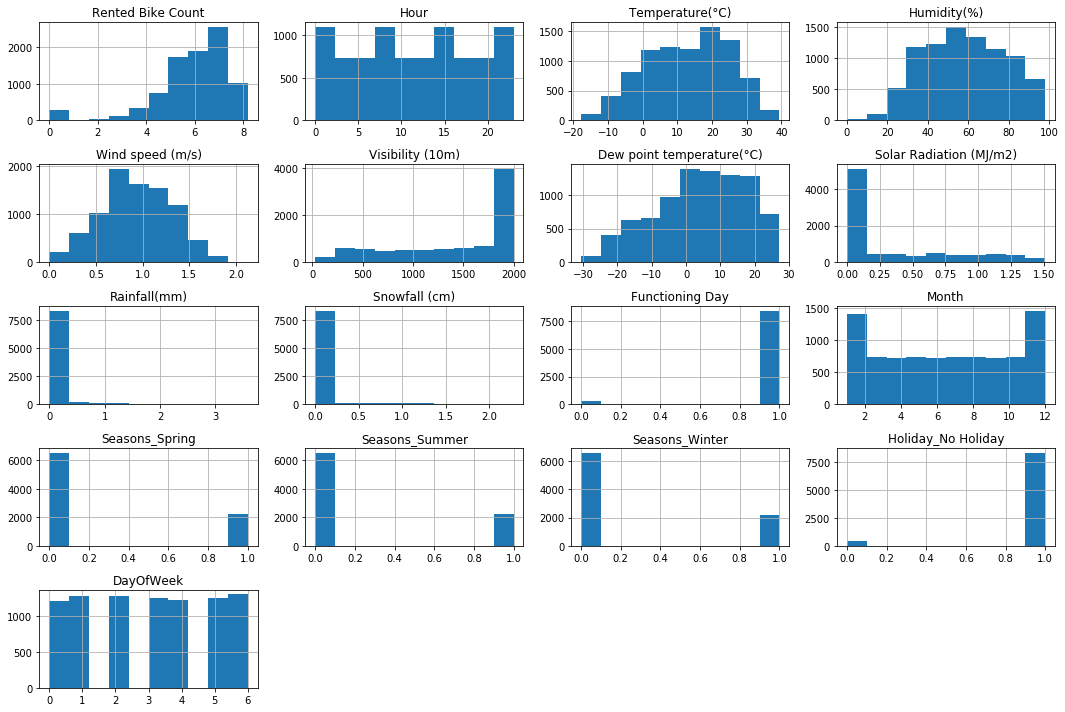

In [158]:
# Plot histograms for the data_all dataframes
data_all.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

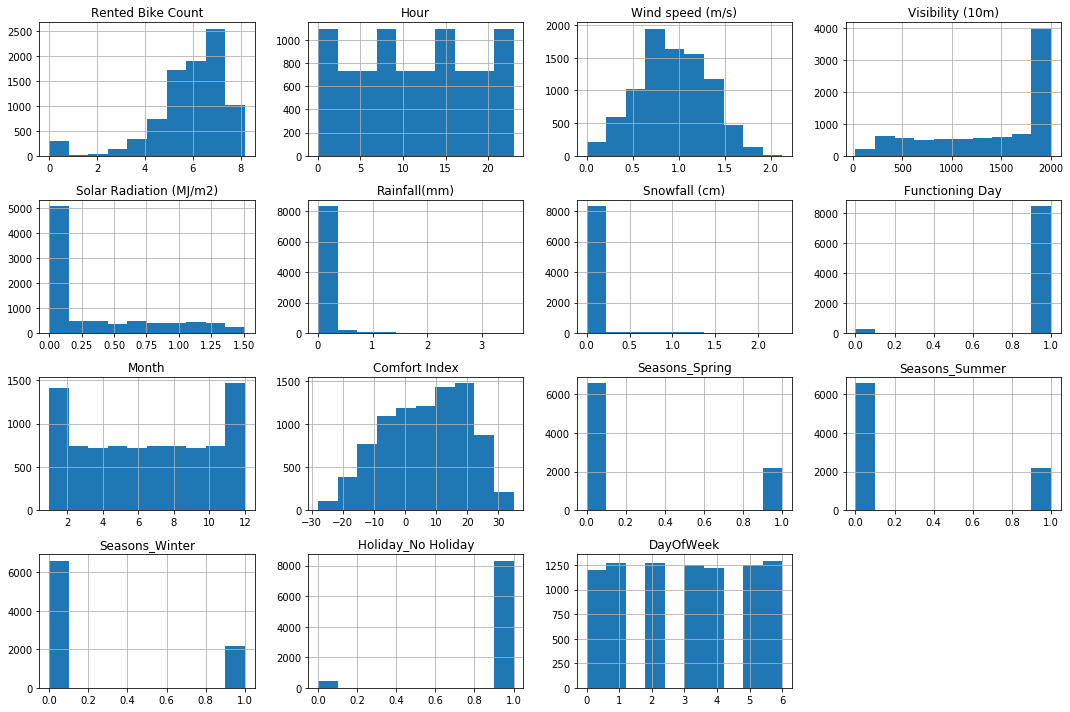

In [159]:
# Plot histograms for the data_new dataframes
data_new.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

### Scaling the Data & Splitting the Data

In [160]:
# Importing train_test_split and StandardScaler from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For the dataframe with all variables

# Create feature variable X and target variable y
X_all = data_all.drop(['Rented Bike Count'], axis=1)
y_all = data_all['Rented Bike Count']

# Create train and test splits
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Apply standardization to the feature variables
scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

# For the dataframe with new variable

# Create feature variable X and target variable y
X_new = data_new.drop(['Rented Bike Count'], axis=1)
y_new = data_new['Rented Bike Count']

# Create train and test splits
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Apply standardization to the feature variables
scaler_new = StandardScaler()
X_train_new = scaler_new.fit_transform(X_train_new)
X_test_new = scaler_new.transform(X_test_new)

(X_train_all.shape, y_train_all.shape), (X_test_all.shape, y_test_all.shape), (X_train_new.shape, y_train_new.shape), (X_test_new.shape, y_test_new.shape)


(((6132, 16), (6132,)),
 ((2628, 16), (2628,)),
 ((6132, 14), (6132,)),
 ((2628, 14), (2628,)))

This code block is preparing the datasets for model training and evaluation. It performs two main tasks: splitting the dataset into a training set and a test set, and standardizing the feature variables. This is done for both the "all variables" dataset (data_all) and the "new variable" dataset (data_new).

The steps are as follows:

Splitting into features and target variables: The features, or independent variables, are all columns except 'Rented Bike Count', which is the target variable. The features are stored in X_all and X_new, and the target variables are stored in y_all and y_new.

Train-test split: The train_test_split function from the sklearn library is used to split the features and target variable into a training set and a test set. The test set size is set to 30% of the total dataset. The random_state parameter is set to ensure that the split is reproducible.

Standardization: The StandardScaler function from sklearn is used to standardize the features. Standardization adjusts the features so that they have a mean of 0 and standard deviation of 1. This is done to ensure that all features are on the same scale and that no feature dominates others when training the model. The scaler is fitted on the training data and then used to transform both the training and test data.

## ***7. ML Model Implementation***

## Models Without cross validation and GridSearch

### Metrics for evaluating Regression models

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2 Score': r2_score(y_true, y_pred)
    }
    return metrics

This code block defines a function named calculate_metrics that calculates four common metrics used for evaluating regression models. These metrics are:

Root Mean Squared Error (RMSE): This is the square root of the mean squared error. It measures the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted and actual values. It's a popular metric for regression problems, but its major disadvantage is that it squares the errors before summing them all, which heavily weights outliers.

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. One of the major advantages of MAE is that it does not heavily weight outliers, unlike MSE.

R2 Score (Coefficient of Determination): This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

The function takes two arguments - y_true (the actual values) and y_pred (the predicted values), and returns a dictionary containing these four metrics.

### ML Model-1-Linear Regression

In [162]:
# Linear Regression
lr_all = LinearRegression().fit(X_train_all, y_train_all)
lr_new = LinearRegression().fit(X_train_new, y_train_new)

# Predictions
lr_all_train_preds = lr_all.predict(X_train_all)
lr_all_test_preds = lr_all.predict(X_test_all)
lr_new_train_preds = lr_new.predict(X_train_new)
lr_new_test_preds = lr_new.predict(X_test_new)

# Calculate metrics for Linear Regression
lr_all_train_metrics = calculate_metrics(y_train_all, lr_all_train_preds)
lr_all_test_metrics = calculate_metrics(y_test_all, lr_all_test_preds)
lr_new_train_metrics = calculate_metrics(y_train_new, lr_new_train_preds)
lr_new_test_metrics = calculate_metrics(y_test_new, lr_new_test_preds)

# Print the metrics
print("Linear Regression Train Metrics for All Data: ", lr_all_train_metrics)
print("Linear Regression Test Metrics for All Data: ", lr_all_test_metrics)
print("Linear Regression Train Metrics for New Data: ", lr_new_train_metrics)
print("Linear Regression Test Metrics for New Data: ", lr_new_test_metrics)


Linear Regression Train Metrics for All Data:  {'RMSE': 0.6815712925126945, 'MSE': 0.4645394267774251, 'MAE': 0.5017729883822841, 'R2 Score': 0.8172017404205631}
Linear Regression Test Metrics for All Data:  {'RMSE': 0.6676253896207764, 'MSE': 0.4457236608662935, 'MAE': 0.4898595194791675, 'R2 Score': 0.8130188512186667}
Linear Regression Train Metrics for New Data:  {'RMSE': 0.7035961178882731, 'MSE': 0.4950474971074487, 'MAE': 0.5163138899599639, 'R2 Score': 0.8051966837171041}
Linear Regression Test Metrics for New Data:  {'RMSE': 0.6892915567657479, 'MSE': 0.4751228502285483, 'MAE': 0.5058523453108064, 'R2 Score': 0.8006858864630816}


### ML Model-2-Ridge Regression

In [163]:
# Ridge Regression
ridge_all = Ridge().fit(X_train_all, y_train_all)
ridge_new = Ridge().fit(X_train_new, y_train_new)

# Predictions
ridge_all_train_preds = ridge_all.predict(X_train_all)
ridge_all_test_preds = ridge_all.predict(X_test_all)
ridge_new_train_preds = ridge_new.predict(X_train_new)
ridge_new_test_preds = ridge_new.predict(X_test_new)

# Calculate metrics for Ridge Regression
ridge_all_train_metrics = calculate_metrics(y_train_all, ridge_all_train_preds)
ridge_all_test_metrics = calculate_metrics(y_test_all, ridge_all_test_preds)
ridge_new_train_metrics = calculate_metrics(y_train_new, ridge_new_train_preds)
ridge_new_test_metrics = calculate_metrics(y_test_new, ridge_new_test_preds)

# Print the metrics
print("Ridge Regression Train Metrics for All Data: ", ridge_all_train_metrics)
print("Ridge Regression Test Metrics for All Data: ", ridge_all_test_metrics)
print("Ridge Regression Train Metrics for New Data: ", ridge_new_train_metrics)
print("Ridge Regression Test Metrics for New Data: ", ridge_new_test_metrics)


Ridge Regression Train Metrics for All Data:  {'RMSE': 0.6815733441909345, 'MSE': 0.46454222351161406, 'MAE': 0.5017888723925809, 'R2 Score': 0.8172006398936482}
Ridge Regression Test Metrics for All Data:  {'RMSE': 0.6675855398535937, 'MSE': 0.4456704530216142, 'MAE': 0.489838072322605, 'R2 Score': 0.8130411719182297}
Ridge Regression Train Metrics for New Data:  {'RMSE': 0.7035961724007783, 'MSE': 0.4950475738170258, 'MAE': 0.516335190512024, 'R2 Score': 0.805196653531556}
Ridge Regression Test Metrics for New Data:  {'RMSE': 0.6892782634131036, 'MSE': 0.4751045244137838, 'MAE': 0.5058666669265014, 'R2 Score': 0.8006935741453787}


### ML Model-3-Lasso Regression

In [164]:
# Lasso Regression
lasso_all = Lasso().fit(X_train_all, y_train_all)
lasso_new = Lasso().fit(X_train_new, y_train_new)

# Predictions
lasso_all_train_preds = lasso_all.predict(X_train_all)
lasso_all_test_preds = lasso_all.predict(X_test_all)
lasso_new_train_preds = lasso_new.predict(X_train_new)
lasso_new_test_preds = lasso_new.predict(X_test_new)

# Calculate metrics for Lasso Regression
lasso_all_train_metrics = calculate_metrics(y_train_all, lasso_all_train_preds)
lasso_all_test_metrics = calculate_metrics(y_test_all, lasso_all_test_preds)
lasso_new_train_metrics = calculate_metrics(y_train_new, lasso_new_train_preds)
lasso_new_test_metrics = calculate_metrics(y_test_new, lasso_new_test_preds)

# Print the metrics
print("Lasso Regression Train Metrics for All Data: ", lasso_all_train_metrics)
print("Lasso Regression Test Metrics for All Data: ", lasso_all_test_metrics)
print("Lasso Regression Train Metrics for New Data: ", lasso_new_train_metrics)
print("Lasso Regression Test Metrics for New Data: ", lasso_new_test_metrics)


Lasso Regression Train Metrics for All Data:  {'RMSE': 1.521292695448524, 'MSE': 2.3143314652250355, 'MAE': 1.1231780139480645, 'R2 Score': 0.08930062865091704}
Lasso Regression Test Metrics for All Data:  {'RMSE': 1.4727787584812, 'MSE': 2.1690772714334248, 'MAE': 1.0900016926726286, 'R2 Score': 0.09007172915201134}
Lasso Regression Train Metrics for New Data:  {'RMSE': 1.521292695448524, 'MSE': 2.3143314652250355, 'MAE': 1.1231780139480645, 'R2 Score': 0.08930062865091704}
Lasso Regression Test Metrics for New Data:  {'RMSE': 1.4727787584812, 'MSE': 2.1690772714334248, 'MAE': 1.0900016926726286, 'R2 Score': 0.09007172915201134}


### ML Model-4-Decision Tree Regression

In [165]:
# Decision Tree
dt_all = DecisionTreeRegressor().fit(X_train_all, y_train_all)
dt_new = DecisionTreeRegressor().fit(X_train_new, y_train_new)

# Predictions
dt_all_train_preds = dt_all.predict(X_train_all)
dt_all_test_preds = dt_all.predict(X_test_all)
dt_new_train_preds = dt_new.predict(X_train_new)
dt_new_test_preds = dt_new.predict(X_test_new)

# Calculate metrics for Decision Tree
dt_all_train_metrics = calculate_metrics(y_train_all, dt_all_train_preds)
dt_all_test_metrics = calculate_metrics(y_test_all, dt_all_test_preds)
dt_new_train_metrics = calculate_metrics(y_train_new, dt_new_train_preds)
dt_new_test_metrics = calculate_metrics(y_test_new, dt_new_test_preds)

# Print the metrics
print("Decision Tree Train Metrics for All Data: ", dt_all_train_metrics)
print("Decision Tree Test Metrics for All Data: ", dt_all_test_metrics)
print("Decision Tree Train Metrics for New Data: ", dt_new_train_metrics)
print("Decision Tree Test Metrics for New Data: ", dt_new_test_metrics)


Decision Tree Train Metrics for All Data:  {'RMSE': 9.822675011235323e-18, 'MSE': 9.648494437634684e-35, 'MAE': 2.1726477977008933e-19, 'R2 Score': 1.0}
Decision Tree Test Metrics for All Data:  {'RMSE': 0.5268981748142442, 'MSE': 0.27762168662258185, 'MAE': 0.3195118386282649, 'R2 Score': 0.8835376569634847}
Decision Tree Train Metrics for New Data:  {'RMSE': 9.822675011235323e-18, 'MSE': 9.648494437634684e-35, 'MAE': 2.1726477977008933e-19, 'R2 Score': 1.0}
Decision Tree Test Metrics for New Data:  {'RMSE': 0.5575825317600905, 'MSE': 0.31089827972399237, 'MAE': 0.32986260040167154, 'R2 Score': 0.8695781207038711}


### ML Model-5-Random Forest Regression

In [166]:
# Random Forest
rf_all = RandomForestRegressor().fit(X_train_all, y_train_all)
rf_new = RandomForestRegressor().fit(X_train_new, y_train_new)

# Predictions
rf_all_train_preds = rf_all.predict(X_train_all)
rf_all_test_preds = rf_all.predict(X_test_all)
rf_new_train_preds = rf_new.predict(X_train_new)
rf_new_test_preds = rf_new.predict(X_test_new)

# Calculate metrics for Random Forest
rf_all_train_metrics = calculate_metrics(y_train_all, rf_all_train_preds)
rf_all_test_metrics = calculate_metrics(y_test_all, rf_all_test_preds)
rf_new_train_metrics = calculate_metrics(y_train_new, rf_new_train_preds)
rf_new_test_metrics = calculate_metrics(y_test_new, rf_new_test_preds)

# Print the metrics
print("Random Forest Train Metrics for All Data: ", rf_all_train_metrics)
print("Random Forest Test Metrics for All Data: ", rf_all_test_metrics)
print("Random Forest Train Metrics for New Data: ", rf_new_train_metrics)
print("Random Forest Test Metrics for New Data: ", rf_new_test_metrics)


Random Forest Train Metrics for All Data:  {'RMSE': 0.1481196424105411, 'MSE': 0.021939428467826563, 'MAE': 0.08998864712603431, 'R2 Score': 0.9913667406706304}
Random Forest Test Metrics for All Data:  {'RMSE': 0.3820159031053612, 'MSE': 0.14593615022540474, 'MAE': 0.23697756926463343, 'R2 Score': 0.9387797610635327}
Random Forest Train Metrics for New Data:  {'RMSE': 0.16358163420106833, 'MSE': 0.026758951047892127, 'MAE': 0.09563571228626366, 'R2 Score': 0.9894702378360886}
Random Forest Test Metrics for New Data:  {'RMSE': 0.39859357583244115, 'MSE': 0.158876838694892, 'MAE': 0.2424481131287572, 'R2 Score': 0.9333511401297835}


### ML Model-6-XGBoost Regression

In [167]:
# XGBoost
xgb_all = XGBRegressor(objective ='reg:squarederror').fit(X_train_all, y_train_all)
xgb_new = XGBRegressor(objective ='reg:squarederror').fit(X_train_new, y_train_new)

# Predictions
xgb_all_train_preds = xgb_all.predict(X_train_all)
xgb_all_test_preds = xgb_all.predict(X_test_all)
xgb_new_train_preds = xgb_new.predict(X_train_new)
xgb_new_test_preds = xgb_new.predict(X_test_new)

# Calculate metrics for XGBoost
xgb_all_train_metrics = calculate_metrics(y_train_all, xgb_all_train_preds)
xgb_all_test_metrics = calculate_metrics(y_test_all, xgb_all_test_preds)
xgb_new_train_metrics = calculate_metrics(y_train_new, xgb_new_train_preds)
xgb_new_test_metrics = calculate_metrics(y_test_new, xgb_new_test_preds)

# Print the metrics
print("XGBoost Train Metrics for All Data: ", xgb_all_train_metrics)
print("XGBoost Test Metrics for All Data: ", xgb_all_test_metrics)
print("XGBoost Train Metrics for New Data: ", xgb_new_train_metrics)
print("XGBoost Test Metrics for New Data: ", xgb_new_test_metrics)


XGBoost Train Metrics for All Data:  {'RMSE': 0.15209428208074235, 'MSE': 0.023132670641656423, 'MAE': 0.10550546951570959, 'R2 Score': 0.9908971947503926}
XGBoost Test Metrics for All Data:  {'RMSE': 0.3771709014914566, 'MSE': 0.14225788893187805, 'MAE': 0.22759580803851506, 'R2 Score': 0.9403227922789831}
XGBoost Train Metrics for New Data:  {'RMSE': 0.18844084809324502, 'MSE': 0.03550995323010144, 'MAE': 0.125612631640989, 'R2 Score': 0.986026680892858}
XGBoost Test Metrics for New Data:  {'RMSE': 0.395193018872821, 'MSE': 0.15617752216581385, 'MAE': 0.24553124254542164, 'R2 Score': 0.9344835038561123}


### Creating Dataframes for result comparison of both the dataframes

In [168]:
# Create a dataframe to hold the metrics results
metrics_results = pd.DataFrame(columns=['Model', 'Data', 'Train RMSE', 'Test RMSE', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2 Score', 'Test R2 Score'], dtype=float)

# List of models
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
data_names = ['All Data', 'New Data']

# List of train and test metrics for all data
train_metrics_all = [lr_all_train_metrics, ridge_all_train_metrics, lasso_all_train_metrics, dt_all_train_metrics, rf_all_train_metrics, xgb_all_train_metrics]
test_metrics_all = [lr_all_test_metrics, ridge_all_test_metrics, lasso_all_test_metrics, dt_all_test_metrics, rf_all_test_metrics, xgb_all_test_metrics]

# List of train and test metrics for new data
train_metrics_new = [lr_new_train_metrics, ridge_new_train_metrics, lasso_new_train_metrics, dt_new_train_metrics, rf_new_train_metrics, xgb_new_train_metrics]
test_metrics_new = [lr_new_test_metrics, ridge_new_test_metrics, lasso_new_test_metrics, dt_new_test_metrics, rf_new_test_metrics, xgb_new_test_metrics]

# Populate the dataframe with metrics results for all data
for i in range(6):
    metrics_results = metrics_results.append({
        'Model': model_names[i],
        'Data': data_names[0],
        'Train RMSE': train_metrics_all[i]['RMSE'],
        'Test RMSE': test_metrics_all[i]['RMSE'],
        'Train MSE': train_metrics_all[i]['MSE'],
        'Test MSE': test_metrics_all[i]['MSE'],
        'Train MAE': train_metrics_all[i]['MAE'],
        'Test MAE': test_metrics_all[i]['MAE'],
        'Train R2 Score': train_metrics_all[i]['R2 Score'],
        'Test R2 Score': test_metrics_all[i]['R2 Score']
    }, ignore_index=True)

# Populate the dataframe with metrics results for new data
for i in range(6):
    metrics_results = metrics_results.append({
        'Model': model_names[i],
        'Data': data_names[1],
        'Train RMSE': train_metrics_new[i]['RMSE'],
        'Test RMSE': test_metrics_new[i]['RMSE'],
        'Train MSE': train_metrics_new[i]['MSE'],
        'Test MSE': test_metrics_new[i]['MSE'],
        'Train MAE': train_metrics_new[i]['MAE'],
        'Test MAE': test_metrics_new[i]['MAE'],
        'Train R2 Score': train_metrics_new[i]['R2 Score'],
        'Test R2 Score': test_metrics_new[i]['R2 Score']
    }, ignore_index=True)

# Display metrics results
metrics_results


,Model,Data,Train RMSE,Test RMSE,Train MSE,Test MSE,Train MAE,Test MAE,Train R2 Score,Test R2 Score
0,Linear Regression,All Data,6.815713e-01,0.667625,4.645394e-01,0.445724,5.017730e-01,0.489860,0.817202,0.813019
1,Ridge Regression,All Data,6.815733e-01,0.667586,4.645422e-01,0.445670,5.017889e-01,0.489838,0.817201,0.813041
2,Lasso Regression,All Data,1.521293e+00,1.472779,2.314331e+00,2.169077,1.123178e+00,1.090002,0.089301,0.090072
3,Decision Tree,All Data,9.822675e-18,0.526898,9.648494e-35,0.277622,2.172648e-19,0.319512,1.000000,0.883538
4,Random Forest,All Data,1.481196e-01,0.382016,2.193943e-02,0.145936,8.998865e-02,0.236978,0.991367,0.938780
5,XGBoost,All Data,1.520943e-01,0.377171,2.313267e-02,0.142258,1.055055e-01,0.227596,0.990897,0.940323
6,Linear Regression,New Data,7.035961e-01,0.689292,4.950475e-01,0.475123,5.163139e-01,0.505852,0.805197,0.800686
7,Ridge Regression,New Data,7.035962e-01,0.689278,4.950476e-01,0.475105,5.163352e-01,0.505867,0.805197,0.800694
8,Lasso Regression,New Data,1.521293e+00,1.472779,2.314331e+00,2.169077,1.123178e+00,1.090002,0.089301,0.090072
9,Decision Tree,New Data,9.822675e-18,0.557583,9.648494e-35,0.310898,2.172648e-19,0.329863,1.000000,0.869578


In [169]:
metrics_results.to_csv('metric_without_cv.csv')

### Creating Dataframes for Feature Importances for all the models for both the dataframes

In [170]:
# Create two dataframes to hold the feature importance results
feature_imp_all = pd.DataFrame(index=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Month', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'DayOfWeek'], dtype=float)
feature_imp_new = pd.DataFrame(index=['Hour', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Month', 'Comfort Index', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'DayOfWeek'], dtype=float)

# Linear models
feature_imp_all['Linear Regression'] = lr_all.coef_
feature_imp_all['Ridge'] = ridge_all.coef_
feature_imp_all['Lasso'] = lasso_all.coef_

feature_imp_new['Linear Regression'] = lr_new.coef_
feature_imp_new['Ridge'] = ridge_new.coef_
feature_imp_new['Lasso'] = lasso_new.coef_

# Tree-based models
feature_imp_all['Decision Tree'] = dt_all.feature_importances_
feature_imp_all['Random Forest'] = rf_all.feature_importances_
feature_imp_all['XGBoost'] = xgb_all.feature_importances_

feature_imp_new['Decision Tree'] = dt_new.feature_importances_
feature_imp_new['Random Forest'] = rf_new.feature_importances_
feature_imp_new['XGBoost'] = xgb_new.feature_importances_

# Display feature importance results
print("Feature Importance for All Data:")
print(feature_imp_all)

print("\nFeature Importance for New Data:")
print(feature_imp_new)


Feature Importance for All Data:
                           Linear Regression     Ridge     Lasso  \
Hour                                0.309934  0.309850  0.000000   
Temperature(°C)                    -0.107310 -0.092022  0.000000   
Humidity(%)                        -0.511123 -0.503813 -0.000000   
Wind speed (m/s)                   -0.007691 -0.007739  0.000000   
Visibility (10m)                   -0.007277 -0.007037  0.000000   
Dew point temperature(°C)           0.670570  0.652724  0.000000   
Solar Radiation (MJ/m2)             0.035426  0.035046  0.000000   
Rainfall(mm)                       -0.375556 -0.375815 -0.000000   
Snowfall (cm)                      -0.011317 -0.011464 -0.000000   
Functioning Day                     1.188888  1.188611  0.107672   
Month                               0.034232  0.034301  0.000000   
Seasons_Spring                     -0.126192 -0.126075  0.000000   
Seasons_Summer                     -0.114976 -0.114673  0.000000   
Seasons_Winter 

### Viewing feature importance for the dataframe with all the features

In [171]:
feature_imp_all
feature_imp_all.to_csv('feature_imp_without_cv_all.csv')

### Viewing feature importance for the dataframe with reduced features

In [172]:
feature_imp_new
feature_imp_new.to_csv('feature_imp_without_cv_new.csv')

## Models Without cross validation and GridSearch

### Defining functions for GridSearch for all the models above

In [173]:
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective ='reg:squarederror')
}

# Define parameter grids for GridSearchCV
param_grid = {
    'Linear Regression': {},
    'Ridge': { 'alpha': [1, 0.1, 0.01, 0.001, 0.0001] },
    'Lasso': { 'alpha': [1, 0.1, 0.01, 0.001, 0.0001] },
    'Decision Tree': { 'max_depth': [5,10,15,20,25] },
    'Random Forest': { 'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5,10,15,20,25] },
    'XGBoost': { 'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.05, 0.10, 0.15, 0.20], 'max_depth': [5,10,15,20,25] }
}


This code block sets up the machine learning models and their respective hyperparameters that will be used for training and optimization. The models include Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, and XGBoost Regressor.

In detail:

Linear Regression: A basic predictive analytics technique. It is used to predict a dependent variable based on the values of at least one independent variable. The goal is to find a relationship between the variables that allows us to predict an outcome. There are no hyperparameters to tune for this model.

Ridge Regression: It is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model. Often, ridge regression is used to prevent overfitting. The hyperparameter to tune is alpha, which controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage.

Lasso Regression: It is a type of linear regression that uses shrinkage. This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection or parameter elimination. The hyperparameter to tune is alpha, which works like the Ridge regression alpha.

Decision Tree Regressor: It builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The hyperparameter to tune is max_depth, which indicates how deep the tree can be.

Random Forest Regressor: A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation. The hyperparameters to tune are n_estimators, which is the number of trees in the forest, and max_depth, which is the maximum depth of the tree.

XGBoost Regressor: XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The hyperparameters to tune are n_estimators, learning_rate (which shrinks the feature weights to make the boosting process more conservative), and max_depth.

Each model has its corresponding parameter grid for tuning. These parameters will be searched using GridSearchCV to find the best performing parameters. GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit the estimator (model) on the training set. In the end, it can select the best parameters from the listed hyperparameters.

### Creating two dataframes for storing performance metrics and feature importance for all the models for both dataframes

In [174]:
# Create dataframes to hold the metrics results
metrics_results_all = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2 Score', 'Test R2 Score'], dtype=float)
metrics_results_new = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2 Score', 'Test R2 Score'], dtype=float)

# Create dataframes to hold the feature importance results
feature_imp_all = pd.DataFrame(index=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Month', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'DayOfWeek'], dtype=float)
feature_imp_new = pd.DataFrame(index=['Hour', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Month', 'Comfort Index', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'DayOfWeek'], dtype=float)


In [175]:
# Run GridSearchCV for each model, calculate metrics, and get feature importance
for model_name, model in models.items():
    print(f"Training Model: {model_name} for All Data")
    gs_all = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    gs_all.fit(X_train_all, y_train_all)
    print(f"Best parameters for {model_name} for All Data: {gs_all.best_params_}")

    # Train the model with the best parameters
    model_all = model.set_params(**gs_all.best_params_)
    model_all.fit(X_train_all, y_train_all)

    # Predict and calculate metrics
    y_pred_train_all = model_all.predict(X_train_all)
    y_pred_test_all = model_all.predict(X_test_all)
    
    metrics_all_train = calculate_metrics(y_train_all, y_pred_train_all)
    metrics_all_test = calculate_metrics(y_test_all, y_pred_test_all)
    metrics_all = {
        'Model': model_name,
        'Train RMSE': metrics_all_train['RMSE'],
        'Test RMSE': metrics_all_test['RMSE'],
        'Train MSE': metrics_all_train['MSE'],
        'Test MSE': metrics_all_test['MSE'],
        'Train MAE': metrics_all_train['MAE'],
        'Test MAE': metrics_all_test['MAE'],
        'Train R2 Score': metrics_all_train['R2 Score'],
        'Test R2 Score': metrics_all_test['R2 Score']
    }
    metrics_results_all = metrics_results_all.append(metrics_all, ignore_index=True)

    # Get feature importance for tree-based models
    if model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        feature_imp_all[model_name] = model_all.feature_importances_

    # Get feature importance (coefficients) for linear models
    elif model_name in ['Linear Regression', 'Ridge', 'Lasso']:
        feature_imp_all[model_name] = model_all.coef_

    print("\n")

    print(f"Training Model: {model_name} for New Data")
    gs_new = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    gs_new.fit(X_train_new, y_train_new)
    print(f"Best parameters for {model_name} for New Data: {gs_new.best_params_}")

    # Train the model with the best parameters
    model_new = model.set_params(**gs_new.best_params_)
    model_new.fit(X_train_new, y_train_new)

    # Predict and calculate metrics
    y_pred_train_new = model_new.predict(X_train_new)
    y_pred_test_new = model_new.predict(X_test_new)
    
    metrics_new_train = calculate_metrics(y_train_new, y_pred_train_new)
    metrics_new_test = calculate_metrics(y_test_new, y_pred_test_new)
    metrics_new = {
        'Model': model_name,
        'Train RMSE': metrics_new_train['RMSE'],
        'Test RMSE': metrics_new_test['RMSE'],
        'Train MSE': metrics_new_train['MSE'],
        'Test MSE': metrics_new_test['MSE'],
        'Train MAE': metrics_new_train['MAE'],
        'Test MAE': metrics_new_test['MAE'],
        'Train R2 Score': metrics_new_train['R2 Score'],
        'Test R2 Score': metrics_new_test['R2 Score']
    }
    metrics_results_new = metrics_results_new.append(metrics_new, ignore_index=True)

    # Get feature importance for tree-based models
    if model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
        feature_imp_new[model_name] = model_new.feature_importances_

    # Get feature importance (coefficients) for linear models
    elif model_name in ['Linear Regression', 'Ridge', 'Lasso']:
        feature_imp_new[model_name] = model_new.coef_

    print("\n")

# Print the results
print("Metrics Results for All Data:")
print(metrics_results_all)
print("\n")
print("Feature Importance for All Data:")
print(feature_imp_all)
print("\n")
print("Metrics Results for New Data:")
print(metrics_results_new)
print("\n")
print("Feature Importance for New Data:")
print(feature_imp_new)


Training Model: Linear Regression for All Data


Best parameters for Linear Regression for All Data: {}


Training Model: Linear Regression for New Data
Best parameters for Linear Regression for New Data: {}


Training Model: Ridge for All Data
Best parameters for Ridge for All Data: {'alpha': 1}


Training Model: Ridge for New Data
Best parameters for Ridge for New Data: {'alpha': 1}


Training Model: Lasso for All Data
Best parameters for Lasso for All Data: {'alpha': 0.001}


Training Model: Lasso for New Data
Best parameters for Lasso for New Data: {'alpha': 0.001}


Training Model: Decision Tree for All Data
Best parameters for Decision Tree for All Data: {'max_depth': 10}


Training Model: Decision Tree for New Data
Best parameters for Decision Tree for New Data: {'max_depth': 10}


Training Model: Random Forest for All Data
Best parameters for Random Forest for All Data: {'max_depth': 25, 'n_estimators': 100}


Training Model: Random Forest for New Data
Best parameters for Random Forest for New Data: {'max_depth': 20, 'n_estim

### Viewing the Dataframes for performance measures and feature importance for the models with Grid Search and 5 Fold CV

In [176]:
# Viewing Dataframe for metric comparison for all models including all features
metrics_results_all
metrics_results_all.to_csv('metrics_results_all_with_cv.csv')

In [177]:
# Viewing Dataframe for metric comparison for all models by droping some features
metrics_results_new
metrics_results_new.to_csv('metrics_results_new_with_cv.csv')

In [178]:
# Viewing Dataframe for feature importance comparison for all models including all features
feature_imp_all
feature_imp_all.to_csv('feature_imp_all_with_cv.csv')

In [179]:
# Viewing Dataframe for feature importance comparison for all models by dropping some features
feature_imp_new
feature_imp_new.to_csv('feature_imp_new_with_cv.csv')

# **Conclusion**

1. Here are some solution to Reduce Customer Churn

* Modify International Plan as the charge is same as normal one.
* Be proactive with communication.
* Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problem in the most churning states.
* Lean into best customers.
* Regular Server Maintenance.
* Solving Poor Network Connectivity Issue.
* Define a roadmap for new customers.
* Analyze churn when it happens.
* Stay competitive.

2. The four charge fields are linear functions of the minute fields.

3. The area code field and/or the state field are anomalous, and can be omitted.

4. Customers with the International Plan tend to churn more frequently.

5. Customers with four or more customer service calls churn more than four times as often as do the other customers.

6. Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

7. There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

8. We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%. For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%. It's the best performing model i found.

9. No overfitting is seen.

10. Due to less no. of data in the dataset, the scores are around 80%. Once we get more data we can retrain our algorithm for better performance.